<div style="text-align: center;">
<h1>Final Project: Motion Deblurring</font></h1>
<h2>Course: Machine Learning</font></h2>

<center><img src="./images/unibo.png" alt="unibo_logo" width="200"/></center>

<h3>Professor: Andrea Asperti</font></h3>
<h3>University: Università degli Studi di Bologna</font></h3>
<h3>Author: Lluis Barca Pons</font></h3>
<h3>Date: 2024-01-15</font></h3>
</div>

***

 ### <font color='BB2E29'>Table of contents<font><a class='anchor' id='top'></a>
1. [Introduction](#1)
   - [Project Overview](#1.1)
   - [Dataset Description](#1.2)
   - [Challenge Specifics](#1.3)
2. [Setup](#2)
   - [Import Libraries](#2.1)
   - [Configure Parameters ](#2.2)
3. [Data Loading and Preprocessing](#3)
   - [Loading MNIST Data Set](#3.1)
   - [Data Preprocessing](#3.2)
4. [Blurred Image Generation](#4)
   - [Blurring Function](#4.1) 
   - [Generating Blurred Images](#4.2)
5. [Model Architecture](#5)
   - [Model Definition](#5.1)
   - [Model Compilation](#5.2) 
6. [Model Training](#6) 
   - [Prepare the training data](#6.1)
   - [Train the model](#6.2)
7. [Model Evaluation](#7)
   - [Prepare the validation data](#7.1) 
   - [Evaluate the model](#7.2)
   - [Visualize the results](#7.3)
8.  [Results Visualization](#8)
    - [Detailed comparision of images](#8.1)
    - [Analysis of the results](#8.2)
9. [Conclusions](#9)

<h1 align="center"><font color='BB2E29'>1. Introduction</font></h1> <a class="anchor" id="1"></a>

<h2> <font color='black'>1.1. Project Overview</font></h2> <a class="anchor" id="1.1"></a>

In this project, our primary objective is to achieve the challenge of motion deblurring in images. Motion blur is a common issue in photography and occurs when the camera or subject moves during the capture of a photo, resulting in a smeared or blurred appearance. This effect can often degrade the quality of an image and obscure details.

The goal is to develop and implement a machine learning model that can effectively deblur such images, restoring them to a clearer state. This process involves not only the removal of blur but also the preservation of underlying image details.

<h2> <font color='black'>1.2. Dataset Description</font></h2> <a class="anchor" id="1.2"></a>

We will be using the MNIST dataset, which is a widely recognized collection of handwritten digits commonly used in image processing and machine learning. Each image in the dataset is a 28x28 grayscale representation of digits from 0 to 9.

<h2> <font color='black'>1.3. Challenge Specifics</font></h2> <a class="anchor" id="1.3"></a>

For this project, the challenge involves artificially introducing motion blur into these MNIST images. The blurring process mimics the effect of a shaky hand or a moving camera. Our task will be to reverse this blurring – effectively developing a deblurring algorithm that can recover the original, unblurred image.

This project will encompass various stages, including data preparation, model development, training, and evaluation. The success of the deblurring algorithm will be quantitatively assessed using the Mean Squared Error (MSE) metric, comparing the deblurred images with the original, unaltered images from the MNIST dataset.

<h1 align="center"><font color='BB2E29'>2. Setup</font></h1> <a class="anchor" id="2"></a>

This section involves setting up the necessary environment for our motion deblurring project. It includes importing required libraries and setting some initial parameters that will be used throughout the notebook.

<h2> <font color='black'>2.1. Import Libraries</font></h2> <a class="anchor" id="2.1"></a>

First, we'll import all the necessary libraries. This includes libraries for data manipulation, machine learning, and visualization.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model, layers
from tensorflow.keras.layers import Conv2D, Input, Add
from tensorflow.keras.callbacks import EarlyStopping

<h2> <font color='black'>2.2. Configure Parameters</font></h2> <a class="anchor" id="2.2"></a>

Here, we can set some global configuration parameters that will be used in the notebook. This could include settings related to image processing, model training, etc.

In [17]:
batch_size = 10000  # Number of samples in each batch
image_size = (28, 28)  # Size of the images in the MNIST dataset
epochs = 10 # Number of times the whole data is used to learn

<h1 align="center"><font color='BB2E29'>3. Data Loading and Preprocessing</font></h1> <a class="anchor" id="3"></a>

In this section, we will load the MNIST dataset and perform necessary preprocessing steps to prepare the data for our deblurring model.

<h2> <font color='black'>3.1. Loading MNIST Data Set</font></h2> <a class="anchor" id="3.1"></a>

The MNIST dataset is a collection of 28x28 grayscale images of handwritten digits (0-9), as we said. It's widely used for benchmarking image processing systems. We will load this dataset using TensorFlow/Keras utilities.

In [18]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the datasets
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


<h2> <font color='black'>3.2. Data Preprocessing</font></h2> <a class="anchor" id="3.2"></a>

Before feeding the data into our model, we need to preprocess it. This usually involves normalizing the pixel values.

In [19]:
# Normalize the pixel values to the range 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Range check
print("Training Data - min:", np.min(x_train), ", max:", np.max(x_train))
print("Test Data - min:", np.min(x_test), ", max:", np.max(x_test))

Training Data - min: 0.0 , max: 1.0
Test Data - min: 0.0 , max: 1.0


It's often useful to visualize some of the data points to understand what our dataset looks like. Let's plot a few images from the MNIST dataset.

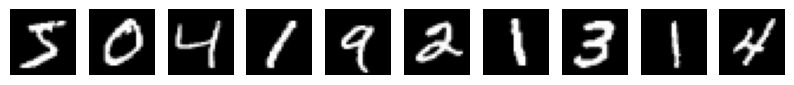

In [20]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Function to display images
def display_images(images, num_images=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

# Display a few images from the dataset
display_images(x_train)

<h1 align="center"><font color='BB2E29'>4. Blurred Image Generation</font></h1> <a class="anchor" id="4"></a>

In this section, we will define and utilize a function to artificially introduce motion blur into the MNIST images. This step is crucial for simulating the effect we aim to deblur later.

<h2> <font color='black'>4.1. Blurring Function</font></h2> <a class="anchor" id="4.1"></a>

We have the method to `generator` the method which has been delivered ready-made by the teacher. This function will take images from the MNIST dataset and apply a motion blur effect. The specifics of the blurring process (like the number of moves and the range of translations) should align with the project guidelines.

In [21]:
def generator(dataset,batchsize,moves=10):
  while True:
    rand = np.random.randint(dataset.shape[0],size=batchsize)
    y_truth = dataset[rand]
    blurred = np.copy(y_truth)
    moving = tf.expand_dims(y_truth,axis=-1)

    for i in range(moves):
      # RandomTranslation requires a channel axis
      moving = layers.RandomTranslation(0.07,0.07,fill_mode='constant',interpolation='bilinear')(moving)
      blurred = blurred + tf.squeeze(moving)
    blurred = blurred/(moves+1)
    yield(blurred,y_truth)

<h2> <font color='black'>4.2. Generating Blurred Images</font></h2> <a class="anchor" id="4.2"></a>

Let's generate a sample batch of blurred images and visualize them to understand the effect of our blurring function.

Blurred Images - min: tf.Tensor(0.0, shape=(), dtype=float32) , max: tf.Tensor(0.99922544, shape=(), dtype=float32)


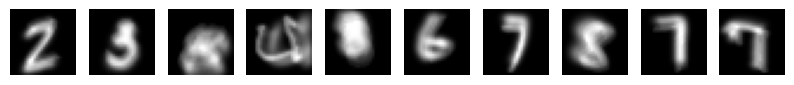

In [22]:
# Generate a sample batch of blurred images
sample_blurred, sample_original = next(generator(x_train, batch_size))

# Range check
print("Blurred Images - min:", np.min(sample_blurred), ", max:", np.max(sample_blurred))

# Visualize the blurred images
display_images(sample_blurred)

<h1 align="center"><font color='BB2E29'>5. Model Architecture</font></h1> <a class="anchor" id="5"></a>

We will design the architecture of the neural network that will be used to deblur the images. The choice of model architecture can significantly impact the performance of deblurring.

<h2> <font color='black'>5.1. Model Definition</font></h2> <a class="anchor" id="5.1"></a>

For deblurring tasks, Convolutional Neural Networks (CNNs) are often effective due to their ability to capture spatial hierarchies in images.
- `Conv2D` layers are used to extract features from the input image.
- `Add` layers are used to add the original image to the extracted features, helping to preserve the underlying image details.

This layers has different hyperparameters: 
- `activation` is the activation function to use. We will use the `relu` function, which is a common choice for CNNs.
- `padding` is the padding to use in the convolutional layers. We will use `same` padding, which pads the input such that the output has the same length as the original input.
- `kernel_size` is the size of the convolutional kernel. We will use a 3x3 kernel for all convolutional layers.

In [23]:
def build_model(input_shape):
    # Define the model architecture
    input_img = Input(shape=input_shape)

    # Encoder
    x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)

    # Decoder
    x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
    x2= Add()([x2, x1])  # Skip connection

    # Output layer
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x2)

    # Declare the model
    model = Model(input_img, decoded)

    return model

model = build_model(input_shape=(28, 28, 1))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 28, 28, 32)           320       ['input_2[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 28, 28, 32)           9248      ['conv2d_3[0][0]']            
                                                                                                  
 add_1 (Add)                 (None, 28, 28, 32)           0         ['conv2d_4[0][0]',            
                                                                     'conv2d_3[0][0]']      

 conv2d_5 (Conv2D)           (None, 28, 28, 1)            289       ['add_1[0][0]']               
                                                                                                  
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


<h2> <font color='black'>5.2. Model Compilation</font></h2> <a class="anchor" id="5.2"></a>

After defining the model architecture, the next step is to compile the model. This includes:
- `Optimizer`: The optimizer is responsible for updating the model parameters during training. We will use the Adam optimizer, which is a popular choice for deep learning tasks.
- `Loss function`: The loss function is used to compute the quantity that the model should seek to minimize during training. We will use the Mean Squared Error (MSE) loss, as a mandatory requirement.

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 28, 28, 32)           320       ['input_2[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 28, 28, 32)           9248      ['conv2d_3[0][0]']            
                                                                                                  
 add_1 (Add)                 (None, 28, 28, 32)           0         ['conv2d_4[0][0]',            
                                                                     'conv2d_3[0][0]']      

<h1 align="center"><font color='BB2E29'>6. Model Training</font></h1> <a class="anchor" id="6"></a>

In this section, we'll train our neural network on the dataset of blurred images. The goal is to enable the model to learn how to deblur these images effectively.

<h2> <font color='black'>6.1. Prepare the training data</font></h2> <a class="anchor" id="6.1"></a>

Before training, we need to prepare our dataset. We'll use the previously created generator to produce both blurred and original images for training.

In [25]:
steps_per_epoch = len(x_train) // batch_size

# Create a generator for training data
train_data_generator = generator(x_train, batch_size)

<h2> <font color='black'>6.2. Train the model</font></h2> <a class="anchor" id="6.2"></a>

Now, we'll train the model using the blurred images as input and the original, unblurred images as targets. The model has different hyperparameters:
- `epochs` is the number of times to iterate over the training dataset.
- `batch_size` is the number of samples per gradient update.
- `callbacks` is a list of callbacks to apply during training. We will use the `EarlyStopping` callback to stop training when the validation loss stops improving.
- `steps_per_epoch` is the number of batches of samples per epoch. We will set this to the number of training samples divided by the batch size.

In [26]:
# Prevent overfitting with early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(
    train_data_generator,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    steps_per_epoch=steps_per_epoch)

Epoch 1/10
6/6 [==============================] - 49s 8s/step - loss: 0.2251
Epoch 2/10
6/6 [==============================] - 47s 8s/step - loss: 0.2059
Epoch 3/10
6/6 [==============================] - 47s 8s/step - loss: 0.1777
Epoch 4/10
6/6 [==============================] - 47s 8s/step - loss: 0.1376
Epoch 5/10
6/6 [==============================] - 46s 8s/step - loss: 0.0957
Epoch 6/10
6/6 [==============================] - 46s 8s/step - loss: 0.0695
Epoch 7/10
6/6 [==============================] - 46s 8s/step - loss: 0.0608
Epoch 8/10
6/6 [==============================] - 47s 8s/step - loss: 0.0591
Epoch 9/10
6/6 [==============================] - 50s 8s/step - loss: 0.0580
Epoch 10/10
6/6 [==============================] - 51s 8s/step - loss: 0.0571


<h1 align="center"><font color='BB2E29'>7. Model Evaluation</font></h1> <a class="anchor" id="7"></a>

After training the model, it's important to evaluate its performance to understand how well it can deblur images. We will use the Mean Squared Error (MSE) metric, as specified in the project guidelines, to quantify the model's accuracy.

<h2> <font color='black'>7.1. Prepare the validation data</font></h2> <a class="anchor" id="7.1"></a>

First, we need to prepare a validation dataset of blurred images to test our model.

In [27]:
# Create a generator for validation data
validation_data_generator = generator(x_test, batch_size)

# Generate a set of validation data (blurred and original images)
validation_blurred, validation_original = next(validation_data_generator)

# Rang of validation_blurred
print("Min:", np.min(validation_blurred))
print("Max:", np.max(validation_blurred))

Min: tf.Tensor(0.0, shape=(), dtype=float32)
Max: tf.Tensor(0.9998018, shape=(), dtype=float32)


<h2> <font color='black'>7.2. Evaluate the model</font></h2> <a class="anchor" id="7.2"></a>

We will use the model to deblur the validation images and then compute the MSE against the original (unblurred) images.

In [28]:
# Use the model to deblur validation images 10 times
mse_list = []
for i in range(10):
    deblurred_images = model.predict(validation_blurred)

    # Remove the extra dimension from deblurred images
    deblurred_images = np.squeeze(deblurred_images)

    mse = np.mean((deblurred_images - validation_original) ** 2)
    mse_list.append(mse)

# Range check
print("Deblurred Images - min:", np.min(deblurred_images), ", max:", np.max(deblurred_images))

# Compute Mean Squared Error and the Standard Deviation between the deblurred images and the original images
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)
print(f"Mean Squared Error on Validation Set: {mse_mean}")
print(f"Standard Deviation on Validation Set: {mse_std}")

313/313 [==============================] - 3s 10ms/step
Deblurred Images - min: 0.008943921 , max: 0.89677346
Mean Squared Error on Validation Set: 0.057029228657484055
Standard Deviation on Validation Set: 0.0


<h2> <font color='black'>7.3. Visualize the results</font></h2> <a class="anchor" id="7.3"></a>

It's often helpful to visually assess the deblurring results. Let's display some of the deblurred images alongside their blurred and original counterparts.

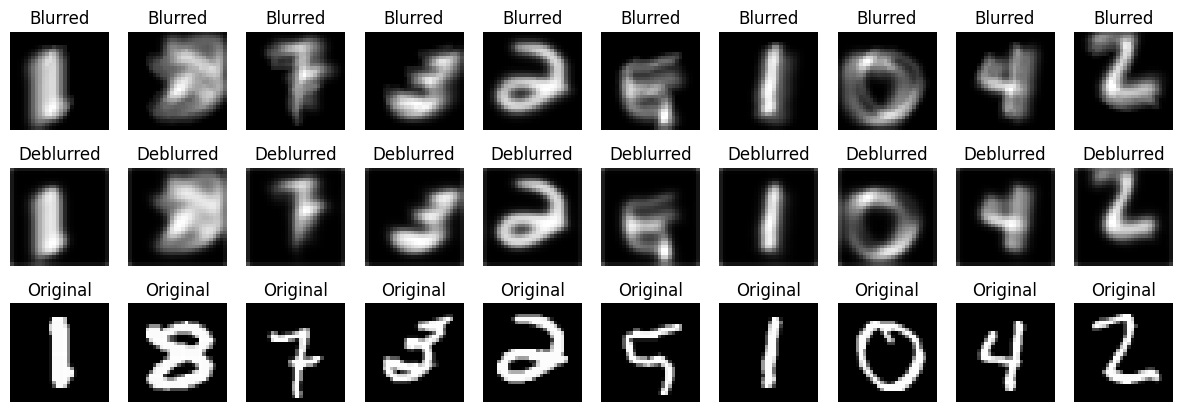

In [29]:
# Function to display images side by side for comparison
def display_comparison(blurred, deblurred, original, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Display blurred image
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(blurred[i].reshape(28, 28), cmap='gray')
        plt.title("Blurred")
        plt.axis('off')

        # Display deblurred image
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(deblurred[i].reshape(28, 28), cmap='gray')
        plt.title("Deblurred")
        plt.axis('off')

        # Display original image
        ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
    plt.show()

# Display the comparison
display_comparison(validation_blurred, deblurred_images, validation_original)


<h1 align="center"><font color='BB2E29'>8. Results Visualization</font></h1> <a class="anchor" id="8"></a>

Visualizing the results is a key step in understanding the effectiveness of our deblurring model. This section will focus on comparing the blurred, deblurred, and original images, providing insights into the model's performance.

<h2> <font color='black'>8.1. Detailed comparision of images</font></h2> <a class="anchor" id="8.1"></a>

To get a clearer picture of how our model performs, we'll display a set of images before and after deblurring, alongside their corresponding original images. This visual comparison helps in assessing the quality of the deblurring process.

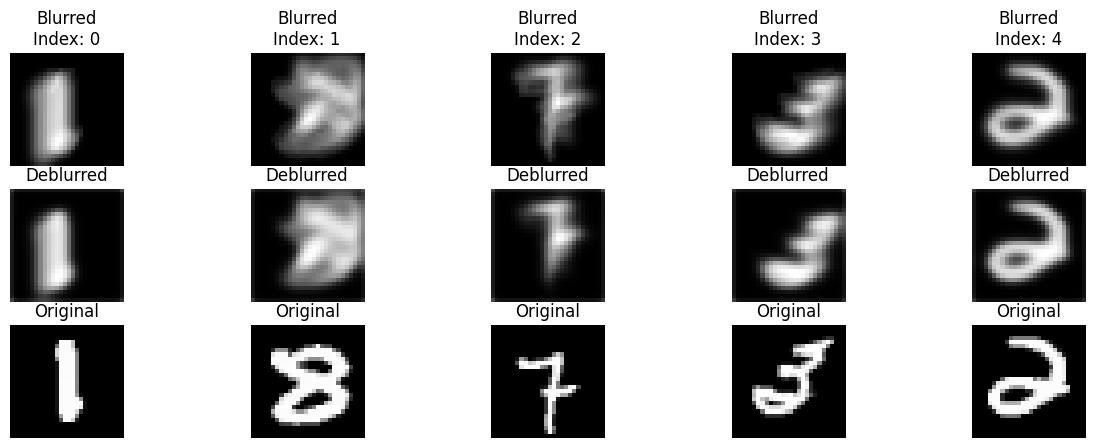

In [30]:
# Function for detailed comparison
def detailed_comparison(blurred, deblurred, original, indices):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        # Display blurred image
        ax = plt.subplot(3, len(indices), i + 1)
        plt.imshow(blurred[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Blurred\nIndex: {idx}")
        plt.axis('off')

        # Display deblurred image
        ax = plt.subplot(3, len(indices), i + 1 + len(indices))
        plt.imshow(deblurred[idx].reshape(28, 28), cmap='gray')
        plt.title("Deblurred")
        plt.axis('off')

        # Display original image
        ax = plt.subplot(3, len(indices), i + 1 + 2 * len(indices))
        plt.imshow(original[idx].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
    plt.show()

# Select specific indices for detailed comparison
selected_indices = [0, 1, 2, 3, 4]  # You can choose different indices based on your dataset
detailed_comparison(validation_blurred, deblurred_images, validation_original, selected_indices)

<h2> <font color='black'>8.2. Analysis of the results</font></h2> <a class="anchor" id="8.2"></a>

After visualizing the comparisons, it's important to analyze the results. Consider the following points:

- **How well does the model remove blur from the images?**
  
  The model seems to have partially removed the blur from the images. The deblurred images are visibly clearer than the blurred ones, indicating that the model is learning to reverse some of the blurring effects. However, some residual blur is present, as details are not as sharp as in the original images. This suggests there is room for further improvement in the model's ability to deblur.

- **Are there any noticeable artifacts introduced by the deblurring process?**
  
  There do not appear to be significant artifacts introduced by the deblurring process, such as ringing or excessive noise, which is a positive outcome. The deblurred images maintain a semblance of smoothness without apparent distortions that are often introduced by aggressive deblurring techniques. 
- **How close are the deblurred images to the original images?**

  The deblurred images show a resemblance to the original images but lack the same level of detail and sharpness. The overall shapes and structures of the digits are recognizable, which is a good sign that the model. However, the deblurred images are not as clear as the original images, indicating that the model is not yet able to fully reverse the blurring process.



<h1 align="center"><font color='BB2E29'>9. Conclusions</font></h1> <a class="anchor" id="9"></a>

The model is effectively reducing blur, but further refinement is needed to reach the sharpness and clarity of the original images. Consider the following steps for improvement:

- **Enhance the Model**: Further refine the model architecture, consider deeper networks or those with residual connections.
- **Hyperparameter Tuning**: Adjust learning rates, batch sizes, and other hyperparameters to find more optimal settings.
- **Training Duration**: Extend training duration if possible, provided overfitting is controlled.
- **Post-Processing**: Explore post-processing techniques that might sharpen the image or improve contrast.
- **Loss Function**: Experiment with different loss functions that might emphasize sharper features or edge preservation.

Probably, by adding more layers to the model, better results could be achieved. The problem is that adding more and denser layers has a direct impact on the adjustment time of the model.

Specifically, the adjustment time could be increased to more than an hour with the computer that the project has been carried out. This is why we have opted for a simpler model, which does not obtain such good results, but which allows several runs to be carried out in order to try out different configurations.